In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data from the CSV file
data = pd.read_csv('solar parameters and energy levels.csv',names =['YYYY', 'DOY', 'HR', 'MN','Bz ','speed', 'density','pressure','electric field','AE index','sym/h','Energy level 40Kev','Energy level 75KeV','Energy level 150 KeV','Energy level 275 KeV','Energy level 475 KeV'],na_values=[99999.9,999.99,9999.99,9999,9999.99
])


In [3]:
# Convert the time columns to a datetime format
#data['datetime'] = pd.to_datetime(data['YYYY']*1000+data['DOY'], format='%Y%j')+pd.to_timedelta(data['HR'], unit='h')+pd.to_timedelta(data['MN'], unit='m')
data["datetime"] =pd.to_datetime(data[['YYYY', 'DOY', 'HR', 'MN']].astype(str).agg('-'.join, axis=1), format='%Y-%j-%H-%M')

# Set the datetime column as the index
data = data.set_index('datetime')

# Select the columns of interest
columns_of_interest = ['sym/h','Energy level 40Kev','Energy level 75KeV','Energy level 150 KeV','Energy level 275 KeV','Energy level 475 KeV']
data = data[columns_of_interest]

In [4]:
data = data.interpolate()

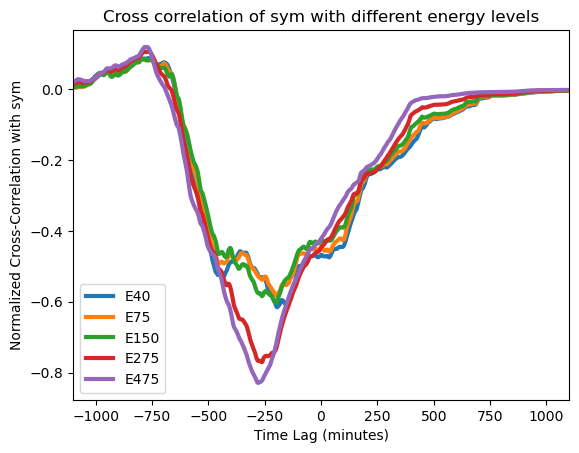

In [5]:
# Select the column of interest for the cross-correlation analysis
colname ='sym/h'

# Compute the cross-correlation with all other columns
for i in range(len(data.columns)):
    if data.columns[i] != colname:
        # Compute the cross-correlation and the time lags
        xcorr = np.correlate(data[colname], data.iloc[:, i], mode='full')
        lags = np.arange(-len(data)+1, len(data))

        # Limit the lags to the desired range
        max_lag =4320
        lag_range = np.logical_and(lags >= -max_lag, lags <= max_lag)
        lags = lags[lag_range]
        xcorr = xcorr[lag_range]
        plt.xcorr(data[colname],data.iloc[:,i],normed=True, usevlines=False, maxlags=1100, linestyle= '-', marker= None,linewidth=3)
#         # Normalize the cross-correlation
        xcorr /= np.max(xcorr)

#         # Plot the cross-correlation as a function of the time lag
#         plt.plot(lags, xcorr, label=data.columns[i])

# Set the axis labels and legend
plt.xlabel('Time Lag (minutes)')
plt.ylabel('Normalized Cross-Correlation with sym')
plt.margins(x=0)
plt.legend(['E40','E75','E150','E275','E475'])
plt.title("Cross correlation of sym with different energy levels")

# Save the figure in high quality
plt.savefig('cross_correlation_vs_time_lag.jpg', dpi=300)

# Display the figure
plt.show()